<h1 style='font-size:40px'>End-to-End Machine Learning Project</h1>

<h2 style='font-size:30px'>Pipelines </h2>
<div>
    <ul style='font-size:20px'>
        <li>
            As pipelines podem ser entendidas como um fluxo de manipulação de dados, composta por vários sistemas, tendo cada um a sua responsabilidade.
        </li>
        <li>
            No contexto do ML, a vantagem desse tipo de estrutura é que cada sistema torna-se independente, já que a fonte de alimentação desse são os resultados do modelo anterior. Caso um deles pare de funcionar, os seus sucessores poderão continuar suas operações com os dados anteriormente produzidos por ele.
        </li>
    </ul>
</div>

<h2 sytle='font-size:30px'>Select a Performance Measure </h2>
<div>
    <ul style='font-size:20px'>
        <li>
            A medida de performance do modelo será o <em>Mean Square Error</em>. O preferimos ao <em>Mean Absolute Error</em> pois ele dá um peso maior a erros grandes.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'>Downloading the Data</h2>

In [1]:
# Nota: ler sobre o six.moves e urllib
import tarfile
with tarfile.open('housing.tgz') as tgz:
    tgz.extractall()

In [2]:
# Carregando os dados no pandas.
import pandas as pd
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Observe que 'total_bedrooms' possui valores nulos.
display(housing.info(), housing.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


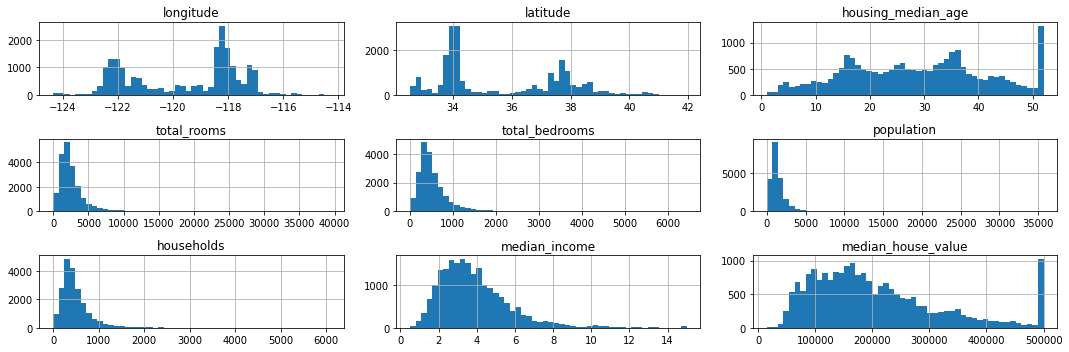

In [4]:
# Recorrendo ao matplotlib para observarmos melhor as ocorrências dos valores numéricos.
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(15,5));
plt.tight_layout()

<h2 style='font-size:30px'> Create a Test Set</h2>

<div>
    <ul style='font-size:20px'>
        <li>
            O livro introduz neste tópico, primeiramente, o método <em>train_test_split</em>, capaz de segregar o dataset de maneira aleatória com o auxílio do argumento <em>random_state</em>.
        </li>
        <li>
            No entanto, o autor argumenta que nem sempre uma amostragem aleatória é eficaz. Às vezes, é importante realizá-la respeitando proporções de determinadas características das instâncias a serem analisadas. Um exemplo disso seria que, em pesquisas eleitorais, busca-se criar uma população amostral com proporções de sexo similares à da população nacional.
        </li>
        <li>
            No contexto do projeto, supusemos que a renda mediana das famílias dos distritos pode ser um fator fundamental na previsão da mediana dos preços dos imóveis. Portanto, seria interessante que o dataset de treino de nossos modelos tenha uma distribuição de renda similar ao do dataset original. Isso poderia ser alcançado por meio da <em>amostragem estratificada</em>.
        </li>
    </ul>
</div>

In [5]:
# Fazendo brevemente o 'train_test_split'.
from sklearn.model_selection import train_test_split
X = housing[[column for column in housing.columns if column != 'median_house_value']]
y = housing['median_house_value']
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set, test_set

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 14196    -117.03     32.71                33.0       3126.0           627.0   
 8267     -118.16     33.77                49.0       3382.0           787.0   
 17445    -120.48     34.66                 4.0       1897.0           331.0   
 14265    -117.11     32.69                36.0       1421.0           367.0   
 2271     -119.80     36.78                43.0       2382.0           431.0   
 ...          ...       ...                 ...          ...             ...   
 11284    -117.96     33.78                35.0       1330.0           201.0   
 11964    -117.43     34.02                33.0       3084.0           570.0   
 5390     -118.38     34.03                36.0       2101.0           569.0   
 860      -121.96     37.58                15.0       3575.0           597.0   
 15795    -122.42     37.77                52.0       4226.0          1315.0   
 
        population  households  median

In [6]:
# Olhando para o histograma de renda mediana, é possível perceber que U$ 20000 e U$ 30000 (2 e 3).
# Possuem um alto número de instâncias. Portanto, o dataset de treino deve também ter uma grande porção
# de distritos cuja renda familiar mediana se encontra nessa faixa de valores.

# Para facilitar o processo de amostragem, podemos designar a cada instância do dataset uma categoria
# de renda familiar ao invés de trabalharmos com valores contínuos.

# Isso facilitará o processo de amostragem estratificada.

# Criando uma nova coluna em 'housing' com as categorias de renda mediana familiar.
import numpy as np
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf])

In [7]:
# Com as categorias feitas, podemos realizar a amostragem estratificada com uma ferramenta própria do 
# scikit-learn, conhecida como 'StratifiedShuffleSplit'
from sklearn.model_selection import StratifiedShuffleSplit

# 'split' será o objeto de amostragem estratificada.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# O método 'split' de 'StratifiedShuffleSplit' segregará o dataset em um conjunto de treino e teste
# respeitando as proporções dos valores presentes em seu segundo argumento (neste caso, housing.income_cat).

# Os valores retornados pelo método serão os índices das linhas do dataset original que comporão o conjunto
# de treino e de teste, respectivamente.
for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [8]:
# Veja que, como queríamos, há uma maior presença de valores em torno de 2 e 3.
strat_train_set.income_cat.value_counts() / len(strat_train_set)

(3.0, 4.5]    0.350594
(1.5, 3.0]    0.318859
(4.5, 6.0]    0.176296
(6.0, inf]    0.114462
(0.0, 1.5]    0.039789
Name: income_cat, dtype: float64

In [9]:
strat_test_set.income_cat.value_counts() / len(strat_test_set)

(3.0, 4.5]    0.350533
(1.5, 3.0]    0.318798
(4.5, 6.0]    0.176357
(6.0, inf]    0.114341
(0.0, 1.5]    0.039971
Name: income_cat, dtype: float64

In [10]:
# Com a amostram feita, podemos retirar  a coluna 'income_cat' dos conjuntos de treino e teste.
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)
strat_train_set['median_house_value']

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

<h2 style='font-size:30px'> Discover and Visualize the Data to Gain Insights</h2>

In [11]:
# Para nos sentirmos mais à vontade em aprofundar a nossa análise dos nossos dados de treino, 
# vamos criar uma cópia deles.
housing = strat_train_set.copy()

<h3 style='font-size:30px;font-style:italic'> Visualizing Geographical Data</h3>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

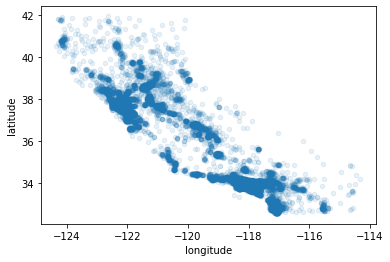

In [12]:
# Com as coordenadas geográficas dos distritos californianos, conseguimos plotar um scatter plot mostrando
# a sua distribuição espacial pelo estado.
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

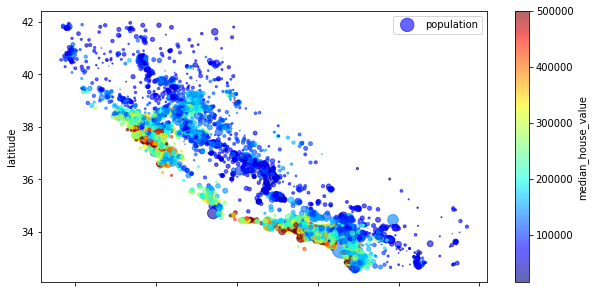

In [13]:
# Como o livro explica, o ser humano é ótimo em identificar padrões em imagens. Dessa forma, temos que explorar essa nossa habilidade 
# natural plotando gráficos criativos.

# Vamos aprimorar um pouco mais o scatter plot. O tamanho dos pontos será diretamente proporcional ao tamanho da população
# dos distritos; a sua cor indicará o preço mediano dos imóveis.
housing.plot(kind='scatter', x='longitude', y='latitude', s=strat_train_set.population / 100, c='median_house_value',
                    alpha=0.6,cmap=plt.get_cmap('jet'),label='population' ,figsize=(10,5))

# De cara, já podemos notar que as áreas costeiras possuem o preço mediano dos imóveis mais alto.
plt.legend()

<h3 style='font-size:30px;font-style:italic'> Looking for Correlations</h3>
<div>
    <ul style='font-size:20px'>
        <li>
            Aqui, buscaremos as correlações entre o preço mediano dos imóveis e cada uma das outras features do dataset.
        </li>
        <li>
            Apenas lembre-se: o coeficiente de correlação capta apenas correlações lineares entre as features. Essa métrica seria incapaz de detectar que, conforme o valor de x se aproxima de 0, y tende a crescer, por exemplo.
        </li>
    </ul>
</div>

In [14]:
# O pandas nos disponibiliza uma função que prontamente calcula o coeficiente de correlação entre as colunas do DF.
housing_corr = housing.corr()['median_house_value'].sort_values(ascending=False)
housing_corr

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

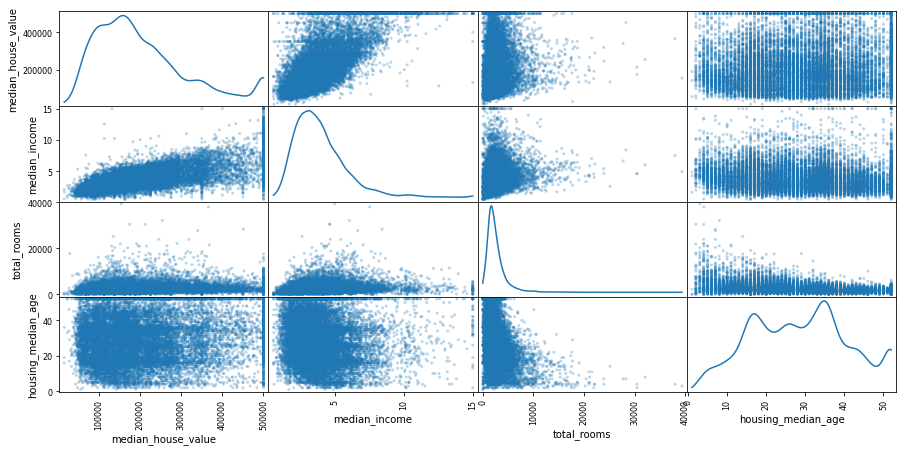

In [15]:
# Vamos selecionar as características cuja correlação com o preço mediano é considerável e plotá-las em uma scatter_matrix.
from pandas.plotting import scatter_matrix
attributes = [feature for feature in housing_corr[housing_corr.values>0.1].index]
scatter_matrix(housing[attributes], alpha=0.3 ,figsize=(15,7), diagonal='kde');

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

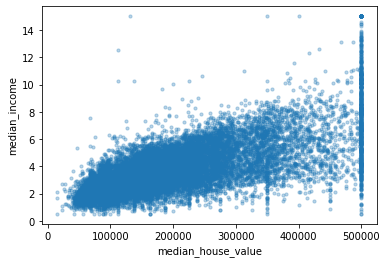

In [16]:
# Como a correlação com a renda mediana é muito mais forte do que as demais, vamos dar uma atenção maior a ela.

# É possível observar que a faixa de U$ 50000,00 tem uma linha vertical, assim como a de U$ 45000,00, U$ 35000 e outras.
# Ou seja, para alguns lugares, parece que a renda mediana das famílias não é um fator impactante no preço dos imóveis.
# O livro recomenda retirar os distritos com esses preços a fim de que o modelo não tente reproduzir essas peculiaridades.
housing.plot(kind='scatter', x='median_house_value', y='median_income', s=10, alpha=0.3)

<h3 style='font-size:30px;font-style:italic'>Experimenting with Attribute Combinations </h3>
<div>
    <ul style='font-size:20px'>
        <li>
            Neste tópico, usaremos ainda mais a nossa imaginação: criaremos novos dados com as informações existentes. Vamos conferir se conseguiremos dar origem a valores mais significativos.
        </li>
    </ul>
</div>

In [17]:
# Índice de cômodos por morador de lar. 
# Ter a contagem total de cômodos em um distrito não é uma informação poderosa para extrairmos algum fato. Vamos criar um dado com
# maior inteligência
housing['rooms_per_household'] = housing.total_rooms / housing.households
housing['rooms_per_household'].head()

12655    5.485836
15502    6.927083
2908     5.393333
14053    3.886128
20496    6.096552
Name: rooms_per_household, dtype: float64

In [18]:
# Índice de quartos por cômodo
# Da mesma maneira, o número total de quartos nos distritos é um dado muito rudimentar, é hora de extrairmos algo mais relevante disso.
housing['bedrooms_per_room'] = housing.total_bedrooms / housing.total_rooms
housing['bedrooms_per_room'].head()

12655    0.205784
15502    0.160714
2908     0.191595
14053    0.276505
20496    0.182692
Name: bedrooms_per_room, dtype: float64

In [19]:
# População sobre o número total de habitantes de lar.
housing['population_per_household'] = housing.population / housing.households
housing['population_per_household'].head()

12655    3.168555
15502    2.623698
2908     2.223333
14053    1.859213
20496    3.167241
Name: population_per_household, dtype: float64

In [20]:
# Com os índices criados, calcularemos novamente as correlações e verificar se demos origem a uma métrica interessante.

# De imediato, vemos que 'rooms_per_household' e 'bedrooms_per_room' possuem uma certa correlação com os preços medianos.
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

<h2 style='font-size:30px'>Prepare the Data for Machine Learning Algorithms</h2>

In [21]:
# Vamos separar as variáveis dependentes das independetes antes de começarmos a fazer a limpagem de dados.
# Isso impedirá que os valores-alvo sofram transformações indesejadas nesse processo.
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set.median_house_value.copy()

<h3 style='font-size:30px;font-style:italic'>Data Cleaning</h3>
<div>
    <ul style='font-size:20px'>
        <li>
            A primeira tarefa da limpeza de dados será lidar com valores nulos. Quando temos uma coluna com NaN's, podemos realizar três procedimentos distintos:
            <ul style='list-style-type:lower-alpha'>
                <li>
                    Remover apenas as linhas com valores nulos.
                </li>
                <li>
                    Remover a coluna em questão.
                </li>
                <li>
                    Preencher os valores nulos com um algo como a média, mediana da coluna.
                </li>
            </ul>
        </li>
    </ul>
</div>

In [22]:
# Para a estratégia 'c', o scikit-learn possui um método muito conveniente capaz de realizar o preenchimento pretendido.
from sklearn.impute import SimpleImputer

# Criando um objeto SimpleImputer que preencherá os valores nulos com a mediana de suas respectivas colunas.
imputer = SimpleImputer(strategy='median')

In [23]:
# Existem colunas no dataset de treino que não são do tipo numérico. Nesse caso, vamos criar uma segmentação 
# de 'strat_train_set_cp' apenas com números.
housing_num = housing.drop(['ocean_proximity'],axis=1)

# Treinando o 'imputer', ou seja, fazendo ele descobrir a mediana de cada coluna numérica.
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [24]:
# Veja como é preciso o aprendizado.
print(imputer.statistics_, '\n\n' ,housing_num.median().values)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155] 

 [-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [25]:
# Com nosso 'SimpleImputer' 'treinado', podemos aplicá-lo no dataset de treino com o método 'transform'.
# O output do método será um array do numpy.
imputer.transform(housing_num)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [26]:
# Transformando os dados do array em um novo DataFrame do pandas.
housing_tr = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns)

# Observe: não há mais valores nulos.
housing_tr[housing_tr.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


<h2 style='font-size:30px'>Scikit-Learn Design</h2>
<div>
    <ul style='font-size:20px'>
        <li>O scikit-learn possui uma estrutura muito bem planejada. Seus objetos podem ser divididos em três categorias distintas.
        </li>
        <ul style='list-style-type:lower-alpha'>
            <li>
                Estimadores: capazes de fazerem estimativas a respeito de um dataset. O <em>SimpleImputer</em> é um exemplo claro desse tipo de objeto, já que ele pode calcular diferentes índices das colunas de um DataFrame. Para cumprirem o seu papel, possuem o método <em>fit</em>. Além disso, são providos de atributos que mostram ao usuário os seus hiperparâmetros e suas estimativas - no caso do <em>SimpleImputer</em>, <em>strategy</em> e <em>statistics_</em>.
            </li>
            <li>
                Transformadores: podem transformar um dataset. Costumam ter o método <em>transform</em> ou <em>fit_transform</em> que causa essa operação. Novamente, <em>SimpleImputer</em> se encaixa nessa categoria.
            </li>
            <li>
                Previsores: esses objetos podem fazer previsões sobre os dados que os alimentam. Por exemplo, todos os métodos de Machine Learning da biblioteca são previsores. Têm o método <em>predict</em> e o <em>score</em> para realizarem as adivinhações e medirem a acurácia delas, respectivamente.
            </li>
       
        </ul>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'>Handling Text and Categorical Attributes</h3>

<div>
    <ul style='font-size:20px'> 
        <li>
            O scikit-learn possui funcionalidades capazes de lidar com dados textuais. Como a maior parte dos modelos prefere trabalhar com números, o objeto <em>OrdinalEncoder</em> pode conferir um código numérico às categorias presentes no dataset.
        </li>
    </ul>
</div>

In [27]:
# Quando carregamos os dados pela primeira vez, vimos que a coluna 'ocean_proximity' era do tipo object.
# Como isso pode configurar um empecilho para o uso de um modelo, vamos converter as suas categorias a códigos numéricos.
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [28]:
# Importando o OrdinalEncoder, de sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [29]:
# O atributo 'categories_', do OrdinalImputer, nos mostra os valores dos códigos numéricos.
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<div>
    <ul style='font-size:20px'>
        <li>
            Mas há um problema com o OrdinalImputer. A ordem hierárquica está equivocada, sendo 'INLAND' o sucessor de '&lt;1H OCEAN', e não 'NEAR OCEAN', por exemplo.
        </li>
        <li>
            Para solucionar esse problema, é possível recorrer a um outro tipo de <em>encoder</em>, conhecido como One-Hot Encoder. Ele criará uma matriz esparsa do scipy em que cada coluna se referenciará a uma categoria presente na coluna do dataset sendo analisada (neste contexto, a <em>ocean_proximity</em>). Se uma dada instância tiver 'NEAR OCEAN' como valor, o valor 1 será designado à coluna dessa mesma categoria na matriz esparsa, enquanto que as demais receberão o valor 0, por exemplo.
        </li>
    </ul>
</div>

In [30]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(cat_encoder.categories_)
housing_cat_1hot

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [31]:
# Para converter a matriz esparsa a um array do numpy, basta usar o método 'toarray'
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

<div>
    <ul style='font-size:20px'>
        <li>
            No entanto, o autor adverte que realizar um One-Hot Encoder sobre um dataset com muitas categorias pode torná-lo grande demais, o que afetará a velocidade de treinamento do modelo e sua performance como um todo
        </li>
        <li>
            Nesse contexto, é interessante termos outras abordagens com relação ao dataset. Se estivermos trablhando com países, por que não trocamos os seus nomes pelo seu PIB per capita, por exemplo? No caso dos nossos dados de <em>housing</em>, trocar as categorias de localização pela real distância dos distritos ao oceano é algo que poderia ser feito.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'>Custom Transformers</h3>
<div> 
    <ul style='font-size:20px'>
        <li>
            O scikit-learn nos providencia classes-base que possibilitam que nós criemos os nossos próprios transformadores. <em>TransformerMixin</em> oferecerá à classe criada o método <em>fit_transform</em>. <em>BaseEstimator</em> conferirá os métodos <em>get_params()</em> e <em>set_params()</em> ao objeto.
        </li>           
    </ul>
</div>

In [32]:
# Vamos criar uma classe capaz de de criar as colunas que nós fizemos na seção Experimenting with Attribute Combinations.
from sklearn.base import TransformerMixin, BaseEstimator
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributeAdder(TransformerMixin, BaseEstimator):
    # O segundo argumento nos possibilitará de inibirmos a criação da coluna 'bedrooms_per_room'.
    # É interessante darmos ao usuário o poder de performar ou não as transformações da classe
    # para que ele descubra as combinções que darão ao modelo um desempenho melhor.
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    # O método 'fit' precisa retornar apenas self para que funcione, e nada mais.
    def fit(self, X, y=None):
        return self
    
    # O 'transform' cuidará das transformações que o nosso dataset receberá.
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        # A métrica 'bedrooms_per_room' será calculada apenas se o usuário quiser.
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    
        # Caso o contrário, a classe devolverá apenas os dois primeiros índices calculados.
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [33]:
# Aplicando a nossa classe à housing.
attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# O DataFrame 'housing' com as transformações feitas.
pd.DataFrame(housing_extra_attribs).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


<h3 style='font-size:30px;font-style:italic'>Feature Scaling</h3>
<div>
    <ul style='font-size:20px'>
        <li>
            Regularizar as escalas de cada feature do dataset é algo que pode impactar positivamente o desempenho de um modelo. Por exemplo, as redes neurais costumam esperar que a escala das características varie entre 0 e 1.
        </li>
        <li>
            Reconhecendo isso, os criadores do scikit-learn construíram objetos que são capazes de automatizar essa regularização. Vamos observar o <em>MinMaxScaler</em> e o <em>StandardScaler</em>.
        </li>
    </ul>
</div>

<center> 
    <h1> Fórmula Min-Max Scaling</h1>
    <img src='min_max1.png'>
</center>

In [34]:
# O MinMaxScaler põe os valores das features dentro de uma escala de 0 a 1.
# Aplicando-o em um array aleatório do numpy.
import numpy as np
from sklearn.preprocessing import MinMaxScaler
array = np.random.rand(3,3)

# Se você quiser alterar a escala, utilize o argumento 'feature_range'.
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(array)

# Desvatagem: o Min-Max Scaling é sensível a pontos fora da curva entre os valores das features.

array([[0.        , 1.        , 0.90539114],
       [0.80942365, 0.        , 1.        ],
       [1.        , 0.20732479, 0.        ]])

<center> 
    <h1> Fórmula Standardization</h1>
    <img src='standardization1.png'>
</center>

In [35]:
# Aplicando um StandardScaler em um novo array aleatório
import numpy as np
from sklearn.preprocessing import StandardScaler
array = np.random.rand(3,3)
standard = StandardScaler()
standard.fit_transform(array)

# Desvantagem: Apesar de Standard Scaler ser menos sensível a outliers, existem algoritmos como as redes neurais esperam escalas de 0 a 1. 
# Portanto, pode ser que esse método de pré-processamento não seja o mais adequado, dependendo do contexto.

array([[-0.62915001,  0.75737778, -1.14014888],
       [ 1.41144678,  0.65561482,  1.29467461],
       [-0.78229678, -1.4129926 , -0.15452573]])

<strong style='font-size:20px'> Nota: o livro orienta que nós devemos <em>fittar</em> os transformadores apenas em X_train. X_test deve receber apenas o <em> transform.</em> </strong>

<h3 style='font-size:30px;font-style:italic'>Transformation Pipelines</h3>
<div>
    <ul style='font-size:20px'>
        <li>
            Assim como o pandas, o scikit-learn possui um método capaz de aplicar em sequência  várias etapas de manipulação de dados. Isso ocorre graças ao objeto Pipeline, de sklearn.pipeline.
        </li>
        <li>
            Vale ressaltar que, ao contrário de <em>pipe</em>, Pipeline espera transformadores (ou seja, classes) como argumentos, e não funções.
        </li>
        <li>
            A vantagem de criar um pipeline é que ele deixa o nosso código mais curto e fácil de ser lido.
        </li>
    </ul>
</div>

In [36]:
# Vamos refazer algumas das etapas de limpeza de dados com o objeto Pipeline.
# Como ele é um transformador geral (aplica as mudanças a todas as colunas do DF), vamos utilizar para 
# o nosso exemplo apenas a seção numérica de 'housing'.
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())  
])

# Um simples 'fit_transform' fará as transformações desejadas instantaneamente.
housing_num_tr = num_pipeline.fit_transform(housing_num)

<h3 style='font-size:30px;font-style:italic'> ColumnTransformer</h3>
<div> 
    <ul style='font-size:20px'>
        <li>
            O ColumnTransformer é uma espécie especial de transformador. Diferentemente de Pipeline, ele é capaz de aplicar mudanças a apenas um conjunto determinado de colunas, e não ao DataFrame inteiro. Isso é bastante conveniente quando o dataset tem colunas numéricas e categóricas, que, naturalmente, requerem tipos distintos de tratamento.
        </li>
    </ul>
</div>

In [37]:
# O problema da célula anterior é solucionado com o objeto ColumnTransformer, do módulo 'compose'.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

# Com esse objeto em mãos, é possível agora fazermos todas as transformações requeridas de uma vez só.
# As suas tuplas de ColumnTransformer recebem três argumentos: um apelido para a etapa de transformação, o objeto transformador,
# e uma lista com os nomes das colunas do DataFrame a sofrerem as alterações em questão.
full_pipeline = ColumnTransformer([
    ('num', num_pipeline ,num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

<div> 
    <ul style='font-size:20px'>
        <li>
            Os mais atentos perceberam um possível problema: <em> num_pipeline</em> retorna um array do numpy como output, já o OneHotEncoder, uma matriz esparsa do numpy. Afinal de contas, como o ColumnTransformer decide o tipo de objeto que ele retornará?
        </li>
        <li>
            Para isso, existe o argumento <em>sparse_threshold</em>. Se a porcentagem de elementos que não sejam 0 for menor do que seu valor, ColumnTransformer retorna uma matriz esparsa. Caso o contrário, um array do numpy é devolvido.
        </li>
    </ul>
</div>

<p style='font-size:16px'> <u>Obs</u>: As colunas não mencionadas em ColumnTransformer serão dropadas por padrão, você pode alterar isso trocando o valor do argumento <em>remainder</em> de 'drop' para 'passthrough'.

<h2 style='font-size:30px'> Select and Train a Model</h2>
<h3 style='font-size:30px;font-style:italic'> Training and Evaluating on the Training Set</h3>
<div>
    <ul style='font-size:20px'> 
        <li>
             Com todas as etapas de pré-processamento concluídas, estamos aptos para finalmente aplicarmos o nosso primeiro modelo!
        </li>
        <li>
            Vamos começar com uma simples regressão linear.
        </li>
    </ul>
</div>

In [38]:
# O scikit-learn recompensa todo o nosso esforço na etapa anterior com ferramentas simples para a criação de modelos.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Treinando o modelo e fazendo-o prever os valores do conjunto de treino.
lin_reg.fit(housing_prepared, housing_labels)
print(f'Valores-alvo: {housing_labels.values}', end='\n\n')
print(f'Previsões: {lin_reg.predict(housing_prepared)}')

Valores-alvo: [ 72100. 279600.  82700. ... 140400. 258100.  62700.]

Previsões: [ 85657.90192014 305492.60737488 152056.46122456 ... 220683.15054463
 238863.55319782  98197.80203821]


In [39]:
# Vamos utilizar o mean_squared_error, de sklearn.metrics.
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(housing_labels, lin_reg.predict(housing_prepared))

# Aqui, estamos extraindo uma outra métrica conhecida como Root Mean Square Error, que é a raiz de Mean Square Error.
# A vantagem de usá-la é que ela ficará na mesma unidade de medida que os valores-alvo (U$, e não U$**2)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

<div> 
    <ul style='font-size:20px'> 
        <li>
            Se retornarmos à matriz de scatter plots do pandas construída anteriormente, veremos que a maior parte dos preços medianos se encontra entre 100000.00 e 250000.00 dólares. Portanto, ter um índice de erro de quase 70 mil no dataset de treino é algo preocupante; estamos tendo um underfitting.
        </li>
        <li>
            Para contornar o problema, poderíamos alimentar o modelo com outras estatísticas, mas vamos optar por escolher um modelo mais complexo do que a regressão linear.
        </li>
    </ul>
</div>

In [40]:
# O modelo escolhido foi a Árvore de Decisão para Regressões.
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
housing_predictions = tree_reg.fit(housing_prepared, housing_labels).predict(housing_prepared)

# Aplicando a 'mean_squared_error' novamente.
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

# A pontuação gerada nos revela que estamos diante de um vício de modelo, um dos principais males das Árvores de Decisão.
tree_rmse

0.0

<h3 style='font-size:30px;font-style:italic'> Better Evaluation Using Cross-Validation</h3>
<div>
    <ul style='font-size:20px'>
        <li>
            Para confirmarmos que a Árvode de Decisão está configurada para se viciar nos dados de treino, podemos avaliar o seu  desempenho quando deparada com informações que ela ainda não conhece.
        </li>
        <li>
            Como o ideal seria que não utilizássemos o conjunto real de teste, podemos criar um sub conjunto de teste e treino a partir do dataset oficial de treino.
        </li>
    </ul>
</div>

In [41]:
# O objeto cross_val_score segmentará o dataset em questão em k-pedaços. Em cada iteração, k-1 pedaços treinarão o modelo, restando
# um único para testá-lo. Esse processo é conhecido como Validação Cruzada.

# Ao final, o objeto retornará uma lista com as pontuações do modelo em cada iteração.

# Primeiro, vamos criar uma Validação Cruzada com a Árvore de Decisão.
from sklearn.model_selection import cross_val_score

# Para cross_val_score, quanto maior o score retornado, melhor o modelo. Como mean_squared_error tem um significado contrário a essa lógica
#, teremos que usar a sua versão com valores negativos.
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(f'Média: {tree_rmse_scores.mean()}')
print(f'Desvio-Padrão: {tree_rmse_scores.std()}')

Média: 71041.61484238438
Desvio-Padrão: 2412.1424214767385


In [42]:
# Vamos aproveitar o momento e fazer o mesmo processo com a Regressão Linear.
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse = np.sqrt(-lin_scores)
print(f'Média: {lin_rmse.mean()}')
print(f'Desvio-Padrão: {lin_rmse.std()}')

Média: 69102.65608631991
Desvio-Padrão: 2880.2457929897346


<div> 
    <ul style='font-size:20px'> 
        <li>
            Conclusão: a árvore de decisão é praticamente tão ruim quanto a regressão linear...
        </li>
        <li>
            Temos um modelo fraco e outro viciado. Nesse contexto, seria interessante encontrar um meio-termo entre esses casos. Para isso, vamos usar o Random Forests, do módulo sklearn.ensemble.
        </li>
        <li>
            A intenção do algoritmo é criar diversas árvores de decisão aleatórias. No caso da regressão, a média dos outputs das árvores será o output final do modelo.
        </li>
    </ul>
</div>

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_reg.fit(housing_prepared, housing_labels)

# Como se trata de um algoritmo complexo, utilizado dentro de validações cruzadas, usar n_jobs=-1 pode
# nos fazer ganhar tempo.
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([51559.63379638, 48737.57100062, 47210.51269766, 51875.21247297,
       47577.50470123, 51863.27467888, 52746.34645573, 50065.1762751 ,
       48664.66818196, 54055.90894609])

In [44]:
# Nâo está perfeito, mas é bem melhor do que os últimos dois!
print(f'Média: {forest_rmse_scores.mean()}')
print(f'Desvio-Padrão: {forest_rmse_scores.std()}')

Média: 50435.58092066179
Desvio-Padrão: 2203.3381412764606


<h2 style='font-size:30px'> Fine-Tune your Model</h2>
<div> 
    <ul style='font-size:20px'>
        <li>
            Esta seção tem o objetivo de introduzir o aluno à tunagem de modelos.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Grid Search</h3>
<div> 
    <ul style='font-size:20px'>
        <li>
            O Grid Search adicionará uma etapa a mais na Validação Cruzada. Para cada divisão do dataset, o método testará o modelo com diferentes valores de hiperparâmetros definidos pelo usuário.
        </li>
    </ul>
</div>

In [45]:
# Aqui, o autor tenta fazer o Grid Search com o Random Forests.
from sklearn.model_selection import GridSearchCV

# Cada dicionário indica um processo de Validação Cruzada diferente.

# Quando não souber quais valores de hiperparâmetro utilizar, é recomendável declarar potências de 10.
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor(n_jobs=-1)

# Ao contrário de 'cross_val_score', o GridSearchCV requer que nós, manualmente, declaremos o método 'fit'.
grid_search = GridSearchCV(forest_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) 
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [46]:
# Os melhores parâmtetros podem ser descobertos com o atributo 'best_params_'.
# O melhor estimador como um todo é mencionado no 'best_estimator_'
grid_search.best_params_, grid_search.best_estimator_

({'max_features': 6, 'n_estimators': 30},
 RandomForestRegressor(max_features=6, n_estimators=30, n_jobs=-1))

In [47]:
# Qual foi o RMSE da melhor Random Forest feita?
grid_search_rmse = np.sqrt(-grid_search.best_score_)
grid_search_rmse

50215.91542704914

In [48]:
# Dados mais detalhados sobre o objeto podem ser acessados com o seu atributo 'cv_results_'
grid_search.cv_results_

{'mean_fit_time': array([0.11291394, 0.32430625, 0.82031035, 0.21279082, 0.46350579,
        1.33117423, 0.28908796, 0.75095096, 1.98303609, 0.46989541,
        0.98953471, 2.7026269 , 0.20802474, 0.53412094, 0.17297363,
        0.57608643, 0.27877607, 0.64346967]),
 'std_fit_time': array([0.02095056, 0.05627526, 0.05721333, 0.05467508, 0.05706484,
        0.03629634, 0.04745658, 0.07070488, 0.19274031, 0.11429863,
        0.08057953, 0.27217468, 0.03063799, 0.0771525 , 0.04454015,
        0.05681258, 0.04872713, 0.19775293]),
 'mean_score_time': array([0.02342553, 0.04906397, 0.08666487, 0.04308834, 0.08845272,
        0.11730285, 0.05948343, 0.07721109, 0.12533674, 0.09010496,
        0.07127881, 0.11734948, 0.06068678, 0.06298833, 0.04984355,
        0.05668025, 0.06127515, 0.04106436]),
 'std_score_time': array([0.02291494, 0.03887546, 0.02137902, 0.02787221, 0.00675298,
        0.01775948, 0.01863571, 0.028902  , 0.02883244, 0.0399827 ,
        0.00968712, 0.02767642, 0.0196376 , 

<div>
    <ul style='font-size:20px'> 
        <li>
            Uma vez descobertos os melhores parâmetros, o GridSearchCV treina o nosso modelo com o dataset de treino por inteiro, e não apenas com os k-1 folds providenciados. Isso ocorre graças ao argumento <em> refit</em>, que, por padrão, é True.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Randomized Search</h3>
<div>
    <ul style='font-size:20px'> 
        <li>
            O scikit-learn também providencia o objeto RandomizedSearchCV, que realiza validações cruzadas em diversas versões do modelo. No entanto, os hiperparâmetros terão seus valores escolhidos aleatoriamente.
        </li>
    </ul>
</div>

In [49]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import RandomizedSearchCV

# Agora, os argumentos do param_grid serão objetos de distribuição do scipy.stats.
param_grid = {'n_estimators':sp_randInt(1, 10), 'max_features':sp_randInt(3, 7)}
forest_reg = RandomForestRegressor(n_jobs=-1)

rdn_src = RandomizedSearchCV(forest_reg, param_distributions=param_grid, scoring='neg_mean_squared_error',
                  cv=5, random_state=0)
rdn_src.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9a1c04c820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9a1c066ee0>},
                   random_state=0, scoring='neg_mean_squared_error')

In [50]:
# O RandomizedSearchCV também conseguiu obter um score melhor do que a regressão e árvoe de decisão.
rdn_src.best_params_, np.sqrt(-rdn_src.best_score_)

({'max_features': 6, 'n_estimators': 9}, 52480.84848642458)

<h2 style='font-size:30px'> Analyze the Best Models and Their Errors</h2>
<div>
    <ul style='font-size:20px'> 
        <li>
            A vantagem de se utilizar um algoritmo que envolva Árvores de Decisão é que ele, normalmente, possui um atributo chamado feature_importances_. Esse contém o grau de relevância que cada feature do dataset teve nas previsões do modelo.
        </li>
    </ul>
</div>

In [51]:
# Vamos descobrir o nível de importância das features
importances = grid_search.best_estimator_.feature_importances_

In [58]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_one_hot_attribs = list(full_pipeline.named_transformers_['cat'].categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(importances, attributes), reverse=True)

[(0.30943742754882114, 'median_income'),
 (0.16526003051829283, 'INLAND'),
 (0.10974922289185117, 'pop_per_hhold'),
 (0.08310579456658185, 'bedrooms_per_room'),
 (0.07990414090432077, 'longitude'),
 (0.06656664690236931, 'latitude'),
 (0.05906796415289688, 'rooms_per_hhold'),
 (0.0409272744852837, 'housing_median_age'),
 (0.017735678734088156, 'population'),
 (0.017379418741241975, 'total_rooms'),
 (0.01677449064744876, 'total_bedrooms'),
 (0.01579940860007008, 'households'),
 (0.009376704972459692, '<1H OCEAN'),
 (0.006254735243145873, 'NEAR OCEAN'),
 (0.002540603494129641, 'NEAR BAY'),
 (0.00012045759699816756, 'ISLAND')]

<div>
    <ul style='font-size:20px'> 
        <li>
            Podemos constatar que, 'INLAND' tem uma relevância muito maior do que as demais categorias de distância ao mar. Quando nos deparamos com dados muito irrelevantes, removê-los pode até mesmo aumentar a performance do modelo.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Evaluate Your System on the Test Set</h2>
<div>
    <ul style='font-size:20px'> 
        <li>
            Tendo um modelo pronto, podemos finalmente utilizá-lo no conjunto de teste! Basta adaptá-lo às modificações feitas na Pipeline criada.
        </li>
    </ul>
</div>

In [66]:
# Invocando o melhor RandomForest produzido na Grid Search
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value']

# Lembre-se, na transformação, use 'transform', e não 'fit_transform'. Não que as escalas do dataset de 
# treino e teste tenham como base os mesmos números.
X_test_prepared = full_pipeline.transform(X_test)

# Fazendo as previsões.
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# Veja! Conseguimos ter um desempenho ainda melhor do que nos dados de teste.
final_rmse

47502.38515043366

In [53]:
! mv /Users/felipeveiga/Desktop/Screen\ Shot\ 2022-04-17\ at\ 19.19.54.png ./standardization1.png

mv: cannot stat '/Users/felipeveiga/Desktop/Screen Shot 2022-04-17 at 19.19.54.png': No such file or directory


Parei em Evaluate Your System on the Test Set na parte do scipy